In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time
import random
import os
from math import *

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE

In [5]:
path = os.getcwd()
print("Le répertoire courant est : " + path)

Le répertoire courant est : /content


In [10]:
data_path = 'content/'
df1 = pd.read_csv('pricing_requests_20req_eachdate.csv')
df2 = pd.read_csv( 'pricing_requests_34reqforlistdates.csv')
df3 = pd.read_csv('pricing_requests_92req_sofia.csv')
df4 = pd.read_csv( 'pricing_requests_92req_valletta.csv')
df5 = pd.read_csv( 'pricing_requests_100req.csv')
df6 = pd.read_csv( 'pricing_requests_500randomreq.csv')
df7 = pd.read_csv( 'pricing_requests_500randomreq_date1.csv')
df8 = pd.read_csv( 'pricing_requests_cities_3000_3100req.csv')
df9 = pd.read_csv( '455_pricing_requests_date22_unzipped.csv')
df10 = pd.read_csv('pricing_requests_500_random.csv')

In [11]:
df_complete_december = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10])

In [15]:
features_hotels = pd.read_csv('features_hotels.csv')
X_test = pd.read_csv('test_set.csv')

In [16]:
#it's the same as in the original column
del features_hotels['city']

In [17]:
df_complete_features = df_complete_december.join(features_hotels.set_index('hotel_id'), on='hotel_id')

In [18]:
X_test_features = X_test.join(features_hotels.set_index('hotel_id'), on='hotel_id')

In [19]:
df_complete_features

,Unnamed: 0,hotel_id,price,stock,city,date,language,mobile,avatar_id,group,brand,parking,pool,children_policy
0,0,144,82,0,rome,0,cypriot,0,110364,Yin Yang,8 Premium,0,0,0
1,1,651,116,0,rome,0,cypriot,0,110364,Independant,Independant,0,0,0
2,2,453,392,0,rome,0,cypriot,0,110364,Chillton Worldwide,Chill Garden Inn,0,0,2
3,3,583,74,0,rome,0,cypriot,0,110364,Accar Hotels,Ibas,0,0,0
4,4,361,165,0,rome,0,cypriot,0,110364,Boss Western,J.Halliday Inn,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52723,139,855,267,6,copenhagen,7,danish,0,212029,Yin Yang,Royal Lotus,0,0,0
52724,140,830,95,4,copenhagen,7,danish,0,212029,Independant,Independant,0,0,0
52725,141,92,89,8,copenhagen,7,danish,0,212029,Independant,Independant,0,0,0
52726,142,435,493,7,copenhagen,7,danish,0,212029,Chillton Worldwide,Chill Garden Inn,0,1,0


In [20]:
X_test_features

,index,order_requests,city,date,language,mobile,avatar_id,hotel_id,stock,group,brand,parking,pool,children_policy
0,0,1,vilnius,21,romanian,0,1,161,46,Boss Western,J.Halliday Inn,1,0,0
1,1,1,vilnius,21,romanian,0,1,187,32,Accar Hotels,Marcure,1,1,0
2,2,1,vilnius,21,romanian,0,1,279,12,Independant,Independant,1,0,0
3,3,1,vilnius,21,romanian,0,1,395,10,Accar Hotels,Ibas,0,0,0
4,4,1,vilnius,21,romanian,0,1,488,42,Accar Hotels,Safitel,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6639,6639,843,rome,5,irish,0,794,987,1,Accar Hotels,Ibas,1,0,0
6640,6640,844,vienna,1,irish,1,794,26,1,Accar Hotels,Marcure,1,0,0
6641,6641,844,vienna,1,irish,1,794,263,0,Boss Western,Boss Western,1,0,0
6642,6642,844,vienna,1,irish,1,794,456,0,Yin Yang,Ardisson,1,0,0


In [21]:
X_test_features = X_test_features.drop(X_test_features.columns[[0,1]], axis=1)
#del X_test_features['mobile']
#del X_test_features['hotel_id']

In [22]:
df_complete_features = df_complete_features.drop(df_complete_features.columns[[0]], axis=1)

In [23]:
df_complete_features

,hotel_id,price,stock,city,date,language,mobile,avatar_id,group,brand,parking,pool,children_policy
0,144,82,0,rome,0,cypriot,0,110364,Yin Yang,8 Premium,0,0,0
1,651,116,0,rome,0,cypriot,0,110364,Independant,Independant,0,0,0
2,453,392,0,rome,0,cypriot,0,110364,Chillton Worldwide,Chill Garden Inn,0,0,2
3,583,74,0,rome,0,cypriot,0,110364,Accar Hotels,Ibas,0,0,0
4,361,165,0,rome,0,cypriot,0,110364,Boss Western,J.Halliday Inn,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52723,855,267,6,copenhagen,7,danish,0,212029,Yin Yang,Royal Lotus,0,0,0
52724,830,95,4,copenhagen,7,danish,0,212029,Independant,Independant,0,0,0
52725,92,89,8,copenhagen,7,danish,0,212029,Independant,Independant,0,0,0
52726,435,493,7,copenhagen,7,danish,0,212029,Chillton Worldwide,Chill Garden Inn,0,1,0


In [24]:
#df_complete_features.reset_index(drop=True, inplace=True)
df_complete_features

,hotel_id,price,stock,city,date,language,mobile,avatar_id,group,brand,parking,pool,children_policy
0,144,82,0,rome,0,cypriot,0,110364,Yin Yang,8 Premium,0,0,0
1,651,116,0,rome,0,cypriot,0,110364,Independant,Independant,0,0,0
2,453,392,0,rome,0,cypriot,0,110364,Chillton Worldwide,Chill Garden Inn,0,0,2
3,583,74,0,rome,0,cypriot,0,110364,Accar Hotels,Ibas,0,0,0
4,361,165,0,rome,0,cypriot,0,110364,Boss Western,J.Halliday Inn,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52723,855,267,6,copenhagen,7,danish,0,212029,Yin Yang,Royal Lotus,0,0,0
52724,830,95,4,copenhagen,7,danish,0,212029,Independant,Independant,0,0,0
52725,92,89,8,copenhagen,7,danish,0,212029,Independant,Independant,0,0,0
52726,435,493,7,copenhagen,7,danish,0,212029,Chillton Worldwide,Chill Garden Inn,0,1,0


**Descriptive analysis**

In [43]:
df_complete_features

,hotel_id,price,stock,city,date,language,mobile,avatar_id,group,brand,parking,pool,children_policy
0,144,82,0,rome,0,cypriot,0,110364,Yin Yang,8 Premium,0,0,0
1,651,116,0,rome,0,cypriot,0,110364,Independant,Independant,0,0,0
2,453,392,0,rome,0,cypriot,0,110364,Chillton Worldwide,Chill Garden Inn,0,0,2
3,583,74,0,rome,0,cypriot,0,110364,Accar Hotels,Ibas,0,0,0
4,361,165,0,rome,0,cypriot,0,110364,Boss Western,J.Halliday Inn,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52723,855,267,6,copenhagen,7,danish,0,212029,Yin Yang,Royal Lotus,0,0,0
52724,830,95,4,copenhagen,7,danish,0,212029,Independant,Independant,0,0,0
52725,92,89,8,copenhagen,7,danish,0,212029,Independant,Independant,0,0,0
52726,435,493,7,copenhagen,7,danish,0,212029,Chillton Worldwide,Chill Garden Inn,0,1,0


**Date distribution analysis**

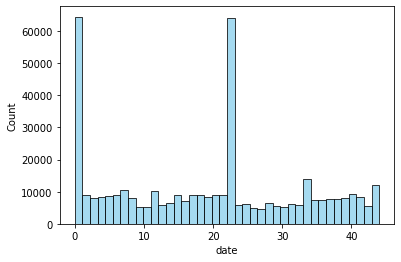

In [44]:
sns.histplot(data=df_complete_features['date'], bins=40, color="skyblue")

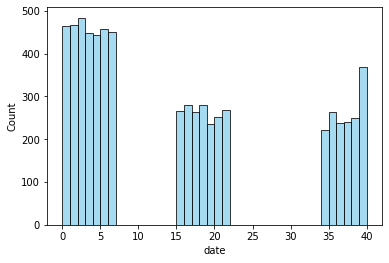

In [46]:
sns.histplot(data=X_test_features['date'], bins=40, color="skyblue")
#sns.kdeplot(df_test['date'], color='red')

**City distribution analysis**

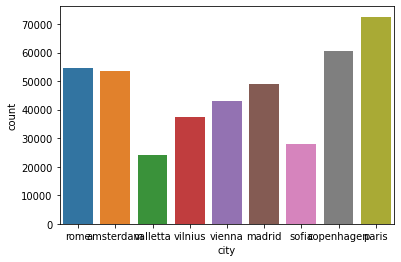

In [51]:
sns.countplot(data=df_complete_features, x="city")

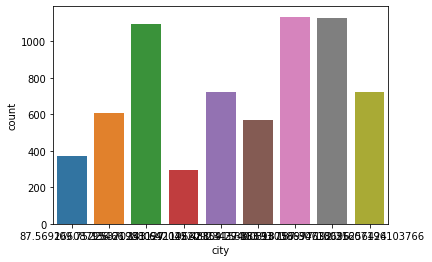

In [52]:
sns.countplot(data=X_test, x="city")

Strategy: So far we have been generating data in respect to the proportions of cities in the test set. As for other features, we have been doing the same. For dates nevertheless, we emphsized on some specific values(0, the mean, and with less consideration 44) (see barplot). In order to balance our dataset and avoid biases, we decided to focus inthe next generation on:


*   Cities : Valetta, Sofia, Vilinius
*   Dates = [0,7], [15,22], [34,40]



In [58]:
y = df_complete_features['price']
y

0         82
1        116
2        392
3         74
4        165
        ... 
52723    267
52724     95
52725     89
52726    493
52727    165
Name: price, Length: 422404, dtype: int64

As we see, the type of **y** is *int64*. To make it more of a regression problem, let's convert it to a float

In [61]:
df_original2 = df_complete_features.astype({'price': 'float'}).copy()

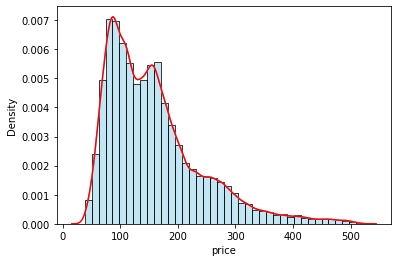

In [ ]:
sns.histplot(data=y, stat='density', bins=40, kde=True, color="skyblue")
sns.kdeplot(y, color='red')

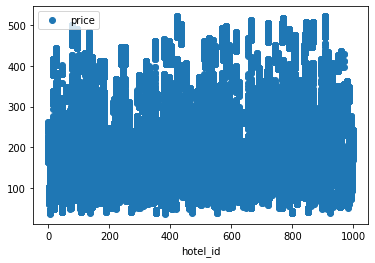

In [63]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 100000

#the previous is to overcome a size limitaion 
df_original2.plot(x='hotel_id', y='price', style='o')

The plot is not very clear but we can say that the price tag for most hotels is in a large range

**Preprocessing for the target embedding**

In [25]:
cities = ['amsterdam', 'copenhagen', 'madrid', 'paris', 'rome', 'sofia', 'valletta', 'vienna', 'vilnius']

#calculate the mean prices for each city
mean_cities = []
for city in cities:
  #isolate the city
  rslt_df = df_complete_features[df_complete_features['city'] == city]
  #rslt_df['city'] =np.mean(rslt_df['price'])
  mean_cities.append(np.mean(rslt_df['price']))

city_mean = dict(zip(cities,mean_cities))

In [26]:
languages = ['austrian', 'belgian', 'bulgarian', 'croatian', 'cypriot', 'czech', 'danish', 'dutch',
             'estonian', 'finnish', 'french', 'german', 'greek', 'hungarian', 'irish', 'italian',
             'latvian', 'lithuanian', 'luxembourgish', 'maltese', 'polish', 'portuguese', 'romanian',
             'slovakian', 'slovene', 'spanish', 'swedish']

#calculate the mean prices for each language
mean_languages = []
for language in languages:
    rslt_df = df_complete_features[df_complete_features['language'] == language]
    mean_languages.append(np.mean(rslt_df['price']))
language_mean = dict(zip(languages,mean_languages))

In [27]:
groups = ['Morriott International','Chillton Worldwide','Independant','Accar Hotels','Yin Yang','Boss Western']

#calculate the mean prices for each city
mean_groups = []
for group in groups:
    rslt_df = df_complete_features[df_complete_features['group'] == group]
    mean_groups.append(np.mean(rslt_df['price']))
group_mean = dict(zip(groups,mean_groups))

In [28]:
brands = ['Chill Garden Inn','Morriot','Royal Lotus','Corlton','Independant','Ibas','Navatel','Ardisson',
'Marcure','Safitel','Boss Western','J.Halliday Inn','8 Premium','Tripletree','CourtYord','Quadrupletree']

#calculate the mean prices for each city
mean_brands = []
for brand in brands:
    rslt_df = df_complete_features[df_complete_features['brand'] == brand]
    mean_brands.append(np.mean(rslt_df['price']))

brand_mean = dict(zip(brands,mean_brands))

In [29]:
def target_embedding(df_original):
    new_df = df_original.copy()
    
    #city
    dfs = []
    for city in cities:
        rslt_df = new_df[new_df['city'] == city]
        rslt_df['city'] = city_mean[city]
        dfs.append(rslt_df)
    new_df = pd.concat(dfs)

    
    #language
    dfs = []
    for language in languages:
        rslt_df = new_df[new_df['language'] == language]
        rslt_df['language'] = language_mean[language]
        dfs.append(rslt_df)
    new_df = pd.concat(dfs)

    
    #group
    dfs = []
    for group in groups:
        rslt_df = new_df[new_df['group'] == group]
        rslt_df['group'] = group_mean[group]
        dfs.append(rslt_df)
    new_df = pd.concat(dfs)
    
    
    #brand
    dfs = []
    for brand in brands:
        rslt_df = new_df[new_df['brand'] == brand]
        rslt_df['brand'] = brand_mean[brand]
        dfs.append(rslt_df)
    new_df = pd.concat(dfs)
    new_df = new_df.sort_index(ascending=True)
    
    return new_df

In [30]:
df_complete_fearures = target_embedding(df_complete_features)
X_test_features = target_embedding(X_test_features)

<ipython-input-29-4924e7019c57>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df['city'] = city_mean[city]
<ipython-input-29-4924e7019c57>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df['language'] = language_mean[language]
<ipython-input-29-4924e7019c57>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

Creation of the final dataset embed used for the training. 

In [ ]:
df_complete_fearures.to_csv('df_complete_embed.csv')

Creation of the final test set embed used for the prediction. 

In [ ]:
X_test_features.to_csv('df_test_embed.csv')

In [33]:
X = df_complete_fearures.copy()
del X['price']
y = df_complete_fearures['price']

In [34]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

**Adversarial Analysis** 

In [36]:
X_test = X_test_features

In [37]:
#adversarial
# 0:train
# 1:test
train_type = [[0] for i in range(len(X))]
train_type = pd.DataFrame(train_type)
X['type'] = train_type

test_type = [[1] for i in range(len(X_test))]
test_type = pd.DataFrame(test_type)
X_test['type'] = test_type

X

,hotel_id,stock,city,date,language,mobile,avatar_id,group,brand,parking,pool,children_policy,type
0,144,0,145.488092,0,152.911381,0,110364,146.417946,75.358440,0,0,0,0
0,832,5,143.642022,10,160.613306,1,147888,94.849510,94.849510,1,0,0,0
0,314,9,187.307130,20,160.377711,1,59874,94.849510,94.849510,1,0,1,0
0,192,0,187.307130,1,159.665626,0,90344,94.849510,94.849510,1,0,0,0
0,336,0,154.294008,1,158.677920,0,147072,132.140342,119.838092,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97685,760,196,163.930387,44,160.613306,1,111263,146.417946,198.475275,0,0,0,0
97686,86,197,163.930387,44,160.613306,1,111263,94.849510,94.849510,1,0,0,0
97687,630,140,163.930387,44,160.613306,1,111263,132.140342,145.757672,0,0,0,0
97688,807,278,163.930387,44,160.613306,1,111263,212.848666,289.597454,0,1,0,0


In [38]:
X_test

,city,date,language,mobile,avatar_id,hotel_id,stock,group,brand,parking,pool,children_policy,type
0,109.752254,21,149.089832,0,1,161,46,132.140342,145.757672,1,0,0,1
1,109.752254,21,149.089832,0,1,187,32,184.379452,194.371843,1,1,0,1
2,109.752254,21,149.089832,0,1,279,12,94.849510,94.849510,1,0,0,1
3,109.752254,21,149.089832,0,1,395,10,184.379452,79.544116,0,0,0,1
4,109.752254,21,149.089832,0,1,488,42,184.379452,284.477644,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6639,145.488092,5,154.120839,0,794,987,1,184.379452,79.544116,1,0,0,1
6640,154.294008,1,154.120839,1,794,26,1,184.379452,194.371843,1,0,0,1
6641,154.294008,1,154.120839,1,794,263,0,132.140342,119.838092,1,0,0,1
6642,154.294008,1,154.120839,1,794,456,0,146.417946,154.249534,1,0,0,1


In [39]:
X_adv = pd.concat([X, X_test])
X_adv

,hotel_id,stock,city,date,language,mobile,avatar_id,group,brand,parking,pool,children_policy,type
0,144,0,145.488092,0,152.911381,0,110364,146.417946,75.358440,0,0,0,0
0,832,5,143.642022,10,160.613306,1,147888,94.849510,94.849510,1,0,0,0
0,314,9,187.307130,20,160.377711,1,59874,94.849510,94.849510,1,0,1,0
0,192,0,187.307130,1,159.665626,0,90344,94.849510,94.849510,1,0,0,0
0,336,0,154.294008,1,158.677920,0,147072,132.140342,119.838092,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6639,987,1,145.488092,5,154.120839,0,794,184.379452,79.544116,1,0,0,1
6640,26,1,154.294008,1,154.120839,1,794,184.379452,194.371843,1,0,0,1
6641,263,0,154.294008,1,154.120839,1,794,132.140342,119.838092,1,0,0,1
6642,456,0,154.294008,1,154.120839,1,794,146.417946,154.249534,1,0,0,1


In [40]:
y_adv = X_adv['type']
del X_adv['type']

In [41]:
X_adv

,hotel_id,stock,city,date,language,mobile,avatar_id,group,brand,parking,pool,children_policy
0,144,0,145.488092,0,152.911381,0,110364,146.417946,75.358440,0,0,0
0,832,5,143.642022,10,160.613306,1,147888,94.849510,94.849510,1,0,0
0,314,9,187.307130,20,160.377711,1,59874,94.849510,94.849510,1,0,1
0,192,0,187.307130,1,159.665626,0,90344,94.849510,94.849510,1,0,0
0,336,0,154.294008,1,158.677920,0,147072,132.140342,119.838092,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6639,987,1,145.488092,5,154.120839,0,794,184.379452,79.544116,1,0,0
6640,26,1,154.294008,1,154.120839,1,794,184.379452,194.371843,1,0,0
6641,263,0,154.294008,1,154.120839,1,794,132.140342,119.838092,1,0,0
6642,456,0,154.294008,1,154.120839,1,794,146.417946,154.249534,1,0,0


In [42]:
y_adv

0       0
0       0
0       0
0       0
0       0
       ..
6639    1
6640    1
6641    1
6642    1
6643    1
Name: type, Length: 429048, dtype: int64